In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import os
import gc

%matplotlib inline

In [2]:
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["figure.figsize"] = (8,3)
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["font.size"] = 10

In [3]:
from IPython.core.display import HTML

def multi_table(table_list):
    ''' Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
    '''
    return HTML(
        '<table><tr style="background-color:white;">' + 
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>'
    )

In [4]:
os.chdir("./arena_data/")

## load data

In [117]:
%%time 
train = pd.read_json("train.json", encoding="utf-8")
test = pd.read_json("test.json", encoding="utf-8")
val = pd.read_json("val.json", encoding="utf-8")
song_meta = pd.read_json("song_meta.json", encoding="utf-8")
genre_gn_all = pd.read_json("genre_gn_all.json", typ = 'series', encoding="utf-8") 

Wall time: 11.3 s


In [18]:
# train.to_csv("train.csv", encoding = "utf-8")
# song_meta.to_csv("song_meta.csv", encoding="utf-8")

In [7]:
import dask.dataframe as ddf

In [8]:
%%time
dtrain = ddf.read_csv("train.csv", n_pa)

Wall time: 24 ms


In [19]:
dsong_meta = ddf.read_csv("song_meta.csv")

In [23]:
dtrain = ddf.from_pandas(train, npartitions=12)

In [29]:
def last_issue(df):
    last_issue_date = []
    lls = df.songs.tolist()
    for song_list in lls:
        last_issue_date.append(song_meta.loc[song_meta.id.isin(song_list)].issue_date.max())
        
    return last_issue_date

## EDA 

In [ ]:
# 비슷한 성향의 playlist ( Nearest Neighbor ) 

### distribution of songs and tags

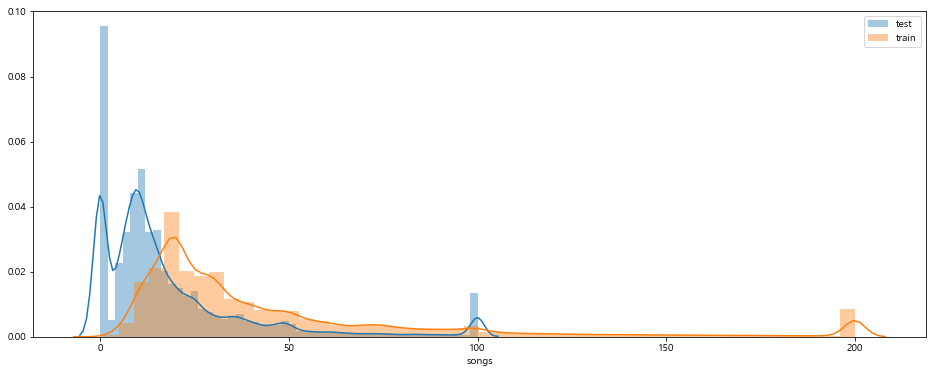

In [6]:
plt.figure(figsize = (16,6))
sns.distplot(test.songs.apply(lambda x: len(x)), label = "test")
sns.distplot(train.songs.apply(lambda x: len(x)), label = "train")
plt.legend()

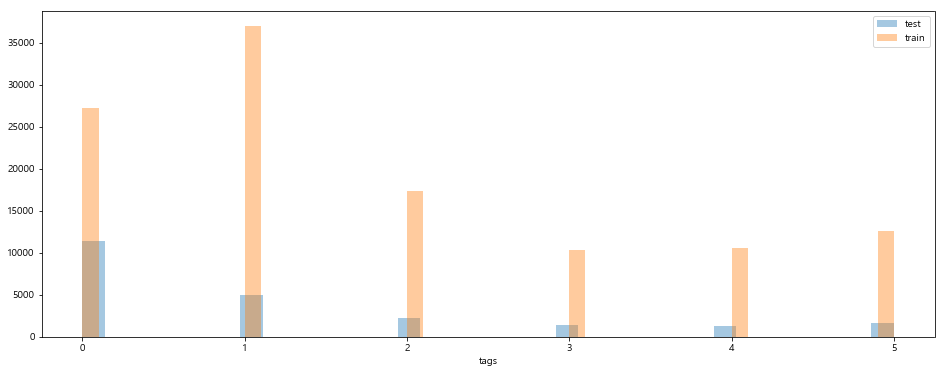

In [7]:
plt.figure(figsize = (16,6))
sns.distplot(test.tags.apply(lambda x: len(x)), label = "test", kde = False)
sns.distplot(train.tags.apply(lambda x: len(x)//2), label = "train", kde = False)
plt.legend()

### Last Issue date of songs in playlist

In [8]:
"""
songs_lst = train.songs.tolist()

%%time
last_issue = []
for lst in songs_lst:
    last_issue.append(song_meta.loc[song_meta.id.isin(lst)].issue_date.max())

train["last_issue"] = last_issue
"""

'\nsongs_lst = train.songs.tolist()\n\n%%time\nlast_issue = []\nfor lst in songs_lst:\n    last_issue.append(song_meta.loc[song_meta.id.isin(lst)].issue_date.max())\n\ntrain["last_issue"] = last_issue\n'

In [9]:
import pickle

# with open("last_issue_date.pickle", "wb") as f:
#    pickle.dump(last_issue,f,protocol=pickle.HIGHEST_PROTOCOL)

In [10]:
with open("last_issue_date.pickle", "rb") as f:
    last_issue = pickle.load(f)

In [43]:
train.last_issue.apply(lambda x : f"{str(x)[:4]}-{str(x)[4:6]}-{str(x)[6:]}")

0         2013-11-22
1         2014-10-20
2         2017-01-10
3         2019-11-15
4         2009-08-24
             ...    
115066    2018-01-01
115067    2015-12-16
115068    2019-04-09
115069    2019-06-21
115070    2019-05-03
Name: last_issue, Length: 115071, dtype: object

In [35]:
train['updt_date'] = pd.to_datetime(train.updt_date)

,tags,id,plylst_title,songs,like_cnt,updt_date,last_issue
0,[락],61281,여행같은 음악,"[525514, 129701, 383374, 562083, 297861, 13954...",71,2013-12-19 18:36:19.000,20131122
1,"[추억, 회상]",10532,요즘 너 말야,"[432406, 675945, 497066, 120377, 389529, 24427...",1,2014-12-02 16:19:42.000,20141020
2,"[까페, 잔잔한]",76951,"편하게, 잔잔하게 들을 수 있는 곡.-","[83116, 276692, 166267, 186301, 354465, 256598...",17,2017-08-28 07:09:34.000,20170110
3,"[연말, 눈오는날, 캐럴, 분위기, 따듯한, 크리스마스캐럴, 겨울노래, 크리스마스,...",147456,크리스마스 분위기에 흠뻑 취하고 싶을때,"[394031, 195524, 540149, 287984, 440773, 10033...",33,2019-12-05 15:15:18.000,20191115
4,[댄스],27616,추억의 노래 ㅋ,"[159327, 553610, 5130, 645103, 294435, 100657,...",9,2011-10-25 13:54:56.000,20090824
...,...,...,...,...,...,...,...
115066,"[록메탈, 밴드사운드, 록, 락메탈, 메탈, 락, extreme]",120325,METAL E'SM #2,"[429629, 441511, 612106, 516359, 691768, 38714...",3,2020-04-17 04:31:11.000,20180101
115067,[일렉],106976,빠른 리스너를 위한 따끈따끈한 최신 인기 EDM 모음!,"[321330, 216057, 534472, 240306, 331098, 23288...",13,2015-12-24 17:23:19.000,20151216
115068,"[담시, 가족, 눈물, 그리움, 주인공, 나의_이야기, 사랑, 친구]",11343,#1. 눈물이 앞을 가리는 나의_이야기,"[50512, 249024, 250608, 371171, 229942, 694943...",4,2019-08-16 20:59:22.000,20190409
115069,"[잔잔한, 버스, 퇴근버스, Pop, 풍경, 퇴근길]",131982,퇴근 버스에서 편히 들으면서 하루를 마무리하기에 좋은 POP,"[533534, 608114, 343608, 417140, 609009, 30217...",4,2019-10-25 23:40:42.000,20190621


In [14]:
test[test.songs.apply(lambda x: len(x) == 0)].shape[0]

4379

### tags, songs, playlist in test and val sets

In [119]:
f"{test[test.songs.apply(lambda x: len(x) == 0)].shape[0] / test.shape[0]:.2%} of test set have no song in playlist"

'19.02% of test set have no song in playlist'

In [124]:
print(f" Total_Test : {test.shape[0]} \n # of Empty tags : {test.tags.apply(lambda x: len(x) == 0).sum()} \n # of Empty songs : {test.songs.apply(lambda x: len(x) == 0).sum()} ")
print(f" # of Empty tags with Empty songs : {test[(test.songs.apply(lambda x: len(x) == 0)) & (test.tags.apply(lambda x: len(x) == 0)) ].shape[0]}")

 Total_Test : 10740 
 # of Empty tags : 5318 
 # of Empty songs : 2043 
 # of Empty tags with Empty songs : 811


In [123]:
print(f" Total_Val : {val.shape[0]} \n # of Empty tags : {val.tags.apply(lambda x: len(x) == 0).sum()} \n # of Empty songs : {val.songs.apply(lambda x: len(x) == 0).sum()} ")
print(f" # of Empty tags with Empty songs : {val[(val.songs.apply(lambda x: len(x) == 0)) & (val.tags.apply(lambda x: len(x) == 0)) ].shape[0]}")

 Total_Val : 23015 
 # of Empty tags : 11410 
 # of Empty songs : 4379 
 # of Empty tags with Empty songs : 1749


In [60]:
test[(test.tags.apply(lambda x: len(x) == 0))].songs.apply(lambda x : len(x))

0        27
1         0
2        14
3        17
4         8
         ..
23003     8
23006    29
23012    12
23013     9
23014    20
Name: songs, Length: 11410, dtype: int64

In [26]:
test[(test.songs.apply(lambda x: len(x) == 0)) & (test.tags.apply(lambda x: len(x) == 0)) ]

,tags,id,plylst_title,songs,like_cnt,updt_date
1,[],131447,앨리스테이블,[],1,2014-07-16 15:24:24.000
9,[],142007,기분 좋은 재즈와 함께 만드는 달달한 하루,[],0,2015-06-22 09:11:02.000
35,[],65114,"■■■■ 사랑,그리고이별 ■■■■",[],6,2010-10-27 10:34:34.000
57,[],87700,마쉬멜로우같은 멜로우한 음악,[],6,2016-01-14 10:19:30.000
71,[],35271,공부와 독서를 위한 #Newage,[],10,2020-01-17 15:46:20.000
...,...,...,...,...,...,...
22903,[],140513,10년이 지나 들어도 좋은 감성 Ballad,[],405,2016-01-11 10:58:05.000
22920,[],124704,가사의 의미와 뜻은모른다!! 오직 멜로디로만 선곡한 팝송!!,[],27,2016-02-05 12:31:59.000
22981,[],13045,＊카페 느낌 샹송♭,[],38,2011-07-12 00:58:39.000
22991,[],32537,컨트리 황제 조니 캐시가 선 레코드 시절 발표한 초기 대표작,[],28,2019-06-17 14:22:48.000


### Song Meta

In [67]:
song_gnr_map = song_meta.loc[:, ['id', 'song_gn_gnr_basket']]

song_gnr_map_unnest = np.dstack(
    (
        np.repeat(song_gnr_map.id.values, list(map(len, song_gnr_map.song_gn_gnr_basket))),
        np.concatenate(song_gnr_map.song_gn_gnr_basket.values)
    )
)

song_gnr_map = pd.DataFrame(data = song_gnr_map_unnest[0], columns = song_gnr_map.columns)
song_gnr_map['id'] = song_gnr_map['id'].astype(str)
song_gnr_map.rename(columns = {'id' : 'song_id', 'song_gn_gnr_basket' : 'gnr_code'}, inplace = True)

del song_gnr_map_unnest

In [87]:
# 1. 곡 별 장르 개수 count 테이블 생성 : song_gnr_count
song_gnr_count = song_gnr_map.groupby('song_id').gnr_code.nunique().reset_index(name = 'mapping_gnr_cnt')

# 2. 1번에서 생성한 테이블을 가지고 매핑된 장르 개수 별 곡 수 count 테이블 생성 : gnr_song_count
gnr_song_count = song_gnr_count.groupby('mapping_gnr_cnt').song_id.nunique().reset_index(name = '매핑된 곡 수')

# 3. 2번 테이블에 비율 값 추가
gnr_song_count.loc[:, '비율(%)'] = round(gnr_song_count['매핑된 곡 수']/sum(gnr_song_count['매핑된 곡 수'])*100, 2)
gnr_song_count = gnr_song_count.reset_index().rename(columns = {'mapping_gnr_cnt' : '장르 수'})
gnr_song_count[['장르 수', '매핑된 곡 수', '비율(%)']]

,장르 수,매핑된 곡 수,비율(%)
0,1,612806,86.69
1,2,92378,13.07
2,3,1694,0.24
3,4,48,0.01
4,5,1,0.00
5,6,3,0.00


In [89]:
gnr_count = song_gnr_map.groupby('gnr_code').song_id.nunique().reset_index(name = 'song_cnt')

In [91]:
genre_gn_all

GN0100       발라드
GN0101    세부장르전체
GN0102       '80
GN0103       '90
GN0104       '00
           ...  
GN2900       뮤지컬
GN2901    세부장르전체
GN2902     국내뮤지컬
GN2903     국외뮤지컬
GN3000     크리스마스
Length: 254, dtype: object

In [65]:
train.songs.apply(lambda x : len(x))

0          19
1          42
2          28
3          38
4          53
         ... 
115066     12
115067     11
115068     11
115069     55
115070    200
Name: songs, Length: 115071, dtype: int64

In [63]:
train.head()

,tags,id,plylst_title,songs,like_cnt,updt_date,last_issue
0,[락],61281,여행같은 음악,"[525514, 129701, 383374, 562083, 297861, 13954...",71,2013-12-19 18:36:19.000,20131122
1,"[추억, 회상]",10532,요즘 너 말야,"[432406, 675945, 497066, 120377, 389529, 24427...",1,2014-12-02 16:19:42.000,20141020
2,"[까페, 잔잔한]",76951,"편하게, 잔잔하게 들을 수 있는 곡.-","[83116, 276692, 166267, 186301, 354465, 256598...",17,2017-08-28 07:09:34.000,20170110
3,"[연말, 눈오는날, 캐럴, 분위기, 따듯한, 크리스마스캐럴, 겨울노래, 크리스마스,...",147456,크리스마스 분위기에 흠뻑 취하고 싶을때,"[394031, 195524, 540149, 287984, 440773, 10033...",33,2019-12-05 15:15:18.000,20191115
4,[댄스],27616,추억의 노래 ㅋ,"[159327, 553610, 5130, 645103, 294435, 100657,...",9,2011-10-25 13:54:56.000,20090824


In [62]:
train[train.songs.apply(lambda x : len(x) == 1)]

,tags,id,plylst_title,songs,like_cnt,updt_date,last_issue
664,[듣는],4829,[Noº1] JAZZ CAFE IN THE CITY 재즈,[205765],98,2019-10-29 14:01:27.000,20160224
6651,"[낮술, 커피, 성수동, 창고]",94366,성수동 창고 까페에서 들으면 좋은 차분한 최신 일렉팝,[600167],396,2019-10-28 17:08:09.000,20170721
8860,"[드라이브, 가을]",71558,시원한바람＃기분전환~★TRANDY★vol.04,[610142],9,2013-10-24 17:51:53.000,20080513
15162,[마시는],14527,"♠이국적인 여유로운 일상,재즈&월드뮤직♠",[27925],57,2019-10-29 14:00:20.000,20090609
21626,"[힙합, 랩]",131519,◈힙합씬의 숨은고수들!◈,[305271],17,2012-06-12 09:21:52.000,20180629
21788,[자기전노래],141169,자자이제,[370525],0,2017-07-25 10:02:57.000,20170407
28738,[팝],95559,크리스마스 in ★뉴욕☆,[255457],27,2012-12-20 12:20:04.000,20091124
35365,"[클래식, 힐링, 팝, 연주, 수면]",152005,기분 좋은 힐링과 수면을 위한 클래식,[313958],1,2019-05-15 10:04:50.000,20111104
42167,"[월드뮤직, 제3세계, 어려울지도, 의외로신남]",118632,No English! 제3세계의 멋진 음악들,[144185],100,2019-10-28 17:09:43.000,20120509
42280,[팝],77476,흐린 가을날 어울리는 어쿠스틱 팝송,[444891],28,2013-09-14 13:00:24.000,20121206


In [55]:
train.head()

,tags,id,plylst_title,songs,like_cnt,updt_date,last_issue
0,[락],61281,여행같은 음악,"[525514, 129701, 383374, 562083, 297861, 13954...",71,2013-12-19 18:36:19.000,20131122
1,"[추억, 회상]",10532,요즘 너 말야,"[432406, 675945, 497066, 120377, 389529, 24427...",1,2014-12-02 16:19:42.000,20141020
2,"[까페, 잔잔한]",76951,"편하게, 잔잔하게 들을 수 있는 곡.-","[83116, 276692, 166267, 186301, 354465, 256598...",17,2017-08-28 07:09:34.000,20170110
3,"[연말, 눈오는날, 캐럴, 분위기, 따듯한, 크리스마스캐럴, 겨울노래, 크리스마스,...",147456,크리스마스 분위기에 흠뻑 취하고 싶을때,"[394031, 195524, 540149, 287984, 440773, 10033...",33,2019-12-05 15:15:18.000,20191115
4,[댄스],27616,추억의 노래 ㅋ,"[159327, 553610, 5130, 645103, 294435, 100657,...",9,2011-10-25 13:54:56.000,20090824


In [29]:
train[train.songs.apply(lambda x : len(x) <= 2)]

,tags,id,plylst_title,songs,like_cnt,updt_date
664,[듣는],4829,[Noº1] JAZZ CAFE IN THE CITY 재즈,[205765],98,2019-10-29 14:01:27.000
6651,"[낮술, 커피, 성수동, 창고]",94366,성수동 창고 까페에서 들으면 좋은 차분한 최신 일렉팝,[600167],396,2019-10-28 17:08:09.000
7802,[감성팝],16612,출근길엔 부드러운 팝음악으로 시작해보아요~,"[543635, 52640]",0,2017-05-17 10:09:00.000
8860,"[드라이브, 가을]",71558,시원한바람＃기분전환~★TRANDY★vol.04,[610142],9,2013-10-24 17:51:53.000
10525,"[드라이브, 까페]",34392,"기분전환 신나는 알앤비, 댄스, 클럽뮤직","[487801, 207647]",18,2012-07-02 12:19:16.000
...,...,...,...,...,...,...
107984,"[기분전환, 카페]",4738,활기찬 하루를 위한 팝송!,"[116341, 470392]",6,2019-06-10 11:13:43.000
109474,"[ASMR, 밤, 새벽, 야한, 민망, 신음, 19금]",73776,야한 ASMR/민망하다❤,[563598],0,2017-12-13 17:58:25.000
109574,[클래식],132724,어디선가 한번씩 들어봤었던 클래식 리스트,[703305],0,2017-03-30 18:30:53.000
113348,"[카페, 재즈피아노, 매장, Jazz, 재즈]",111851,♪경쾌한 ♬★JAZZ PIANO♬★,"[364301, 219531]",33,2016-04-01 12:11:31.000


In [51]:
song_meta

,song_gn_dtl_gnr_basket,issue_date,album_name,album_id,artist_id_basket,song_name,song_gn_gnr_basket,artist_name_basket,id
0,[GN0901],20140512,불후의 명곡 - 7080 추억의 얄개시대 팝송베스트,2255639,[2727],Feelings,[GN0900],[Various Artists],0
1,"[GN1601, GN1606]",20080421,"Bach : Partitas Nos. 2, 3 & 4",376431,[29966],"Bach : Partita No. 4 In D Major, BWV 828 - II....",[GN1600],[Murray Perahia],1
2,[GN0901],20180518,Hit,4698747,[3361],Solsbury Hill (Remastered 2002),[GN0900],[Peter Gabriel],2
3,"[GN1102, GN1101]",20151016,Feeling Right (Everything Is Nice) (Feat. Popc...,2644882,[838543],Feeling Right (Everything Is Nice) (Feat. Popc...,[GN1100],[Matoma],3
4,"[GN1802, GN1801]",20110824,그남자 그여자,2008470,[560160],그남자 그여자,[GN1800],[Jude Law],4
...,...,...,...,...,...,...,...,...,...
707984,[GN2001],19991219,The Best Best Of The Black President,65254,[166499],Coffin For Head Of State,[GN2000],[Fela Kuti],707984
707985,[GN0901],19860000,True Colors,44141,[11837],Change Of Heart,[GN0900],[Cyndi Lauper],707985
707986,"[GN0105, GN0101]",20160120,행보 2015 윤종신 / 작사가 윤종신 Live Part.1,2662866,[437],스치듯 안녕,[GN0100],[윤종신],707986
707987,"[GN1807, GN1801]",20131217,명상의 시간을 위한 뉴에이지 음악,2221722,[729868],숲의 빛,[GN1800],[Nature Piano],707987


In [52]:
import tensorflow as tf

In [53]:
tf.__version__

'1.15.0'

In [6]:
train.shape

(115071, 6)

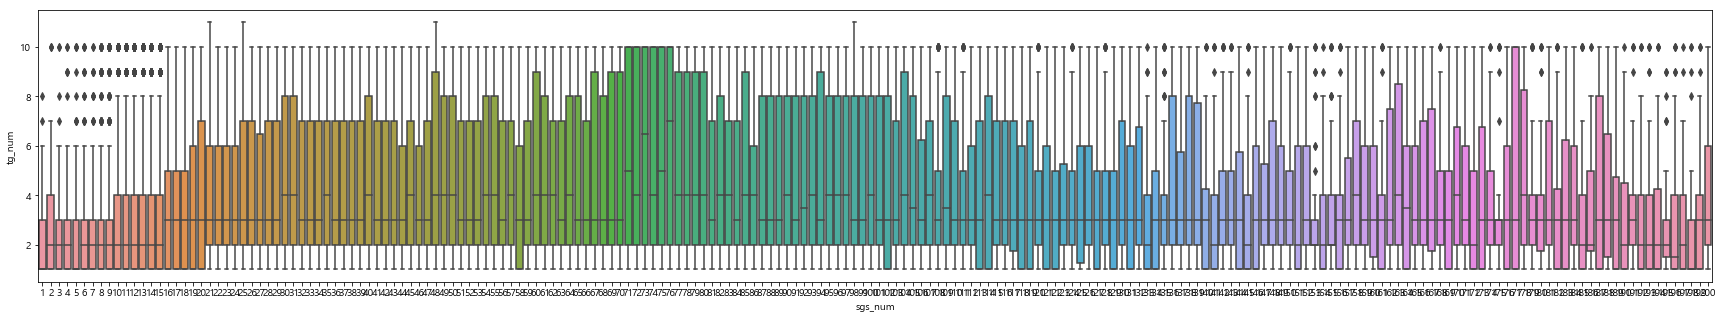

In [17]:
tags_num = train.tags.apply(lambda x : len(x))
songs_num = train.songs.apply(lambda x : len(x))

pd.DataFrame({"tg_num" : tags_num , "sgs_num" : songs_num})
plt.figure(figsize = (30,5))
sns.boxplot(data=pd.DataFrame({"tg_num" : tags_num , "sgs_num" : songs_num})
, y = "tg_num", x = "sgs_num")

In [19]:
ret = []

for tags in train.tags.tolist():
    ret += tags
    
from collections import Counter

ret = dict(Counter(ret))
ret = sorted(ret.items(), key=lambda x: -x[1])

In [24]:
ret

[('기분전환', 16465),
 ('감성', 11417),
 ('휴식', 11215),
 ('발라드', 10796),
 ('잔잔한', 10218),
 ('드라이브', 10095),
 ('힐링', 9783),
 ('사랑', 8704),
 ('새벽', 8320),
 ('밤', 7615),
 ('카페', 6837),
 ('추억', 6520),
 ('팝', 6425),
 ('힙합', 6413),
 ('이별', 5400),
 ('설렘', 4910),
 ('신나는', 4861),
 ('회상', 4579),
 ('매장음악', 4576),
 ('여행', 4559),
 ('인디', 4531),
 ('가을', 4042),
 ('락', 4007),
 ('겨울', 3965),
 ('스트레스', 3925),
 ('슬픔', 3527),
 ('뉴에이지', 3493),
 ('랩', 3421),
 ('봄', 3387),
 ('여름', 3297),
 ('댄스', 3293),
 ('Pop', 3248),
 ('재즈', 3213),
 ('알앤비', 3186),
 ('비오는날', 2982),
 ('까페', 2856),
 ('산책', 2731),
 ('운동', 2646),
 ('분위기', 2467),
 ('OST', 2323),
 ('일렉', 2234),
 ('클래식', 2155),
 ('피아노', 1920),
 ('위로', 1910),
 ('소울', 1871),
 ('클럽', 1644),
 ('팝송', 1623),
 ('연주곡', 1539),
 ('EDM', 1528),
 ('주말', 1490),
 ('트렌디', 1483),
 ('명곡', 1445),
 ('커피', 1356),
 ('취향저격', 1352),
 ('오후', 1338),
 ('아이돌', 1322),
 ('매장', 1311),
 ('저녁', 1286),
 ('어쿠스틱', 1241),
 ('그루브', 1237),
 ('아침', 1183),
 ('우울', 1133),
 ('편안한', 1094),
 ('RnB', 996),
 ('퇴근길',

### (train) like_cnt

In [4]:
train['updt_date'] = pd.to_datetime(train.updt_date)

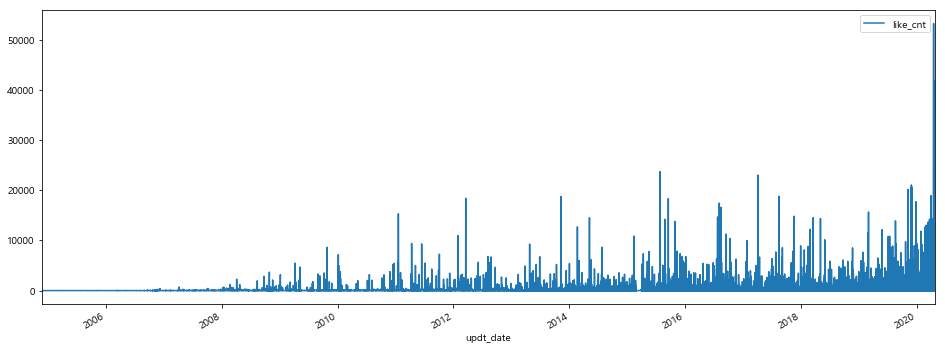

In [8]:
train.set_index("updt_date")[["like_cnt"]].plot()

In [15]:
train["year"] = train.updt_date.dt.year
train["month"] = train.updt_date.dt.month

In [25]:
sorted(train.year.unique())

[2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020]

In [19]:
train.head()

,tags,id,plylst_title,songs,like_cnt,updt_date,year,month
0,[락],61281,여행같은 음악,"[525514, 129701, 383374, 562083, 297861, 13954...",71,2013-12-19 18:36:19,2013,12
1,"[추억, 회상]",10532,요즘 너 말야,"[432406, 675945, 497066, 120377, 389529, 24427...",1,2014-12-02 16:19:42,2014,12
2,"[까페, 잔잔한]",76951,"편하게, 잔잔하게 들을 수 있는 곡.-","[83116, 276692, 166267, 186301, 354465, 256598...",17,2017-08-28 07:09:34,2017,8
3,"[연말, 눈오는날, 캐럴, 분위기, 따듯한, 크리스마스캐럴, 겨울노래, 크리스마스,...",147456,크리스마스 분위기에 흠뻑 취하고 싶을때,"[394031, 195524, 540149, 287984, 440773, 10033...",33,2019-12-05 15:15:18,2019,12
4,[댄스],27616,추억의 노래 ㅋ,"[159327, 553610, 5130, 645103, 294435, 100657,...",9,2011-10-25 13:54:56,2011,10


### (train) songs list & (song_meta) song_meta data

In [37]:
song_meta.head()

,song_gn_dtl_gnr_basket,issue_date,album_name,album_id,artist_id_basket,song_name,song_gn_gnr_basket,artist_name_basket,id
0,[GN0901],20140512,불후의 명곡 - 7080 추억의 얄개시대 팝송베스트,2255639,[2727],Feelings,[GN0900],[Various Artists],0
1,"[GN1601, GN1606]",20080421,"Bach : Partitas Nos. 2, 3 & 4",376431,[29966],"Bach : Partita No. 4 In D Major, BWV 828 - II....",[GN1600],[Murray Perahia],1
2,[GN0901],20180518,Hit,4698747,[3361],Solsbury Hill (Remastered 2002),[GN0900],[Peter Gabriel],2
3,"[GN1102, GN1101]",20151016,Feeling Right (Everything Is Nice) (Feat. Popc...,2644882,[838543],Feeling Right (Everything Is Nice) (Feat. Popc...,[GN1100],[Matoma],3
4,"[GN1802, GN1801]",20110824,그남자 그여자,2008470,[560160],그남자 그여자,[GN1800],[Jude Law],4


In [39]:
song_meta[song_meta.artist_id_basket.apply(lambda x : len(x) > 2)]

,song_gn_dtl_gnr_basket,issue_date,album_name,album_id,artist_id_basket,song_name,song_gn_gnr_basket,artist_name_basket,id
23,"[GN1601, GN1615, GN1610]",20171006,Christmas at Westminster Abbey,10104201,"[345328, 36652, 347399]",Anonymous: Up! Awake! From Highest Steeple - A...,[GN1600],"[Choir Of Westminster Abbey, Simon Preston, Ch...",23
38,[GN1701],20200214,Life Goes On,10388022,"[230549, 216184, 30344]",Copycat: After You,[GN1700],"[Carla Bley, Andy Sheppard, Steve Swallow]",38
55,[GN1101],20140101,Who`s That Lately,182963,"[863476, 866871, 866872]",Who`s That Lately (Feat. Shaka Lish)(Original ...,[GN1100],"[Annuki, Jedi Bonker, Shaka Lish]",55
84,"[GN1601, GN1615, GN1610]",20060526,Choral Adagios,102000,"[163617, 262473, 29646]","Mozart : Ave Verum Corpus, K.618",[GN1600],"[Cambridge King`s College Choir, James Vivian,...",84
103,[GN1701],19991231,Dr. Cyclops` Dream,4702483,"[885178, 2288424, 2294058, 885176, 2216160]",Valse Macabre,[GN1700],"[Ben Allison, The Herbie Nichols Project, Tim ...",103
...,...,...,...,...,...,...,...,...,...
707848,"[GN1601, GN1605]",20110328,Vivaldi Masterworks,1232551,"[163335, 268766, 193333, 347276, 30993, 32094,...","Vivaldi: 12 Concertos, Op.3 - &#34;L&#39;estro...",[GN1600],"[Monica Huggett, John Holloway, Susan Sheppard...",707848
707864,"[GN1601, GN1607]",19890101,"Puccini, G.: Madama Butterfly (Opera) (Raichev)",3932518,"[773548, 2009649, 724062, 345130, 2011478, 31704]","Puccini: Madama Butterfly - Act II: Un Bel Di,...",[GN1600],"[Sofia National Opera Orchestra, Sofia Nationa...",707864
707884,"[GN0601, GN0606]",20110624,KBS COOL FM 개국 46주년 특별 기획 음반,1317158,"[478160, 1176, 254481, 225888, 517700, 548623]",크게 라디오를 켜고,[GN0600],"[칵스 (THE KOXX), 이현우, 최강희, 데니안, 이특 (LEETEUK), 은...",707884
707923,"[GN1601, GN1615, GN1610]",20170623,The Gundula Janowitz Edition,10075129,"[32075, 29131, 104890]",R.Strauss : Vier Letzte Lieder TrV.296 - II. S...,[GN1600],"[Gundula Janowitz, Bernard Haitink, Royal Conc...",707923


In [52]:
tmp_data = train.head(10)

In [54]:
train.head()

,tags,id,plylst_title,songs,like_cnt,updt_date,last_issue
0,[락],61281,여행같은 음악,"[525514, 129701, 383374, 562083, 297861, 13954...",71,2013-12-19 18:36:19.000,20131122
1,"[추억, 회상]",10532,요즘 너 말야,"[432406, 675945, 497066, 120377, 389529, 24427...",1,2014-12-02 16:19:42.000,20141020
2,"[까페, 잔잔한]",76951,"편하게, 잔잔하게 들을 수 있는 곡.-","[83116, 276692, 166267, 186301, 354465, 256598...",17,2017-08-28 07:09:34.000,20170110
3,"[연말, 눈오는날, 캐럴, 분위기, 따듯한, 크리스마스캐럴, 겨울노래, 크리스마스,...",147456,크리스마스 분위기에 흠뻑 취하고 싶을때,"[394031, 195524, 540149, 287984, 440773, 10033...",33,2019-12-05 15:15:18.000,20191115
4,[댄스],27616,추억의 노래 ㅋ,"[159327, 553610, 5130, 645103, 294435, 100657,...",9,2011-10-25 13:54:56.000,20090824


In [61]:
def get_metadata(songs_lst):
    df = pd.DataFrame(songs_lst, columns=["id"])
    df = df.merge(song_meta[["id", "issue_date", "artist_id_basket", "song_gn_gnr_basket"]],n on = "id")
    return df

# 하나의 songs_lst마다 0.2초 소요 => 시간이 너무 많이 걸려서 힘들어 보임

In [9]:
multi_table([train.head(20), song_meta.head(50)])

,tags,id,plylst_title,songs,like_cnt,updt_date
0,[락],61281,여행같은 음악,"[525514, 129701, 383374, 562083, 297861, 13954...",71,2013-12-19 18:36:19.000
1,"[추억, 회상]",10532,요즘 너 말야,"[432406, 675945, 497066, 120377, 389529, 24427...",1,2014-12-02 16:19:42.000
2,"[까페, 잔잔한]",76951,"편하게, 잔잔하게 들을 수 있는 곡.-","[83116, 276692, 166267, 186301, 354465, 256598...",17,2017-08-28 07:09:34.000
3,"[연말, 눈오는날, 캐럴, 분위기, 따듯한, 크리스마스캐럴, 겨울노래, 크리스마스,...",147456,크리스마스 분위기에 흠뻑 취하고 싶을때,"[394031, 195524, 540149, 287984, 440773, 10033...",33,2019-12-05 15:15:18.000
4,[댄스],27616,추억의 노래 ㅋ,"[159327, 553610, 5130, 645103, 294435, 100657,...",9,2011-10-25 13:54:56.000
5,"[운동, 드라이브, Pop, 트로피컬하우스, 힐링, 기분전환, 2017, 팝, 트렌...",69252,2017 Pop Trend,"[418694, 222305, 96545, 135950, 304687, 457451...",435,2017-09-15 15:59:26.000
6,"[짝사랑, 취향저격, 슬픔, 고백, 사랑, 이별]",45339,짝사랑..고백..사랑..이별..슬픔.. 감성을 자극하는곡들!,"[528130, 505036, 398947, 627363, 37748, 376358...",24,2016-10-24 21:30:17.000
7,"[잔잔한, 추억, 회상]",36557,멍청이.. 내맘도 몰라.,"[496913, 632529, 501426, 515574, 411161, 10341...",5,2008-09-23 22:32:02.000
8,"[일렉트로니카, 포크, 메탈, 락, 댄스, 인디]",70741,DANCING IN THE MOON-LIGHT .01,"[634861, 270738, 163936, 692209, 449477, 56342...",0,2019-11-30 21:17:59.000
9,"[록, Metal, 이일우, M에센셜, 메탈, Rock, 락]",10288,[록/메탈] Written by 이일우,"[613315, 439294, 230806, 497932, 113479, 93506...",7,2016-06-17 18:23:54.000


In [6]:
tmp_df = train.head(10)

In [8]:
%%time
song_meta_dict = song_meta[["id", "issue_date", "artist_id_basket", "song_gn_gnr_basket"]].set_index("id").to_dict()

Wall time: 686 ms


In [18]:
# song_meta_dict.get(list(song_meta_dict.keys())[0])

In [24]:
song_meta_dict

{'artist_id_basket': {0: [2727],
  1: [29966],
  2: [3361],
  3: [838543],
  4: [560160],
  5: [475840],
  6: [162097, 100237],
  7: [105210, 261542],
  8: [224583],
  9: [753752],
  10: [1625859],
  11: [104493],
  12: [236766],
  13: [1221039],
  14: [455705],
  15: [2727],
  16: [896417],
  17: [750053],
  18: [2636332],
  19: [230399],
  20: [1627886],
  21: [417985],
  22: [5985],
  23: [345328, 36652, 347399],
  24: [518420],
  25: [100043],
  26: [2727],
  27: [2296395],
  28: [485100],
  29: [10854],
  30: [861436],
  31: [721858],
  32: [1759976],
  33: [227228],
  34: [721670],
  35: [681291],
  36: [785949],
  37: [7786],
  38: [230549, 216184, 30344],
  39: [2696540],
  40: [726278],
  41: [35370],
  42: [104130],
  43: [27326, 14433],
  44: [104141],
  45: [2727],
  46: [29590],
  47: [588331],
  48: [2960],
  49: [177747],
  50: [104355],
  51: [2190604],
  52: [837217],
  53: [2727],
  54: [500421],
  55: [863476, 866871, 866872],
  56: [699077],
  57: [727602],
  58: [1

In [6]:
##

In [7]:
train.loc[:, ['songs', 'updt_date']]

,songs,updt_date
0,"[525514, 129701, 383374, 562083, 297861, 13954...",2013-12-19 18:36:19.000
1,"[432406, 675945, 497066, 120377, 389529, 24427...",2014-12-02 16:19:42.000
2,"[83116, 276692, 166267, 186301, 354465, 256598...",2017-08-28 07:09:34.000
3,"[394031, 195524, 540149, 287984, 440773, 10033...",2019-12-05 15:15:18.000
4,"[159327, 553610, 5130, 645103, 294435, 100657,...",2011-10-25 13:54:56.000
...,...,...
115066,"[429629, 441511, 612106, 516359, 691768, 38714...",2020-04-17 04:31:11.000
115067,"[321330, 216057, 534472, 240306, 331098, 23288...",2015-12-24 17:23:19.000
115068,"[50512, 249024, 250608, 371171, 229942, 694943...",2019-08-16 20:59:22.000
115069,"[533534, 608114, 343608, 417140, 609009, 30217...",2019-10-25 23:40:42.000


In [26]:
playlist_id_date_map = train.loc[:, ['songs', 'updt_date']]

In [27]:
playlist_id_map_unnest  = np.dstack(
    (
        np.concatenate(playlist_id_date_map.songs.values),
        np.repeat(playlist_id_date_map.updt_date.values, list(map(len, playlist_id_date_map.songs))), 
    )
)

In [28]:
playlist_id_map_unnest

array([[[525514, '2013-12-19 18:36:19.000'],
        [129701, '2013-12-19 18:36:19.000'],
        [383374, '2013-12-19 18:36:19.000'],
        ...,
        [640239, '2020-04-18 20:35:06.000'],
        [13759, '2020-04-18 20:35:06.000'],
        [154078, '2020-04-18 20:35:06.000']]], dtype=object)

In [31]:
playlist_id_date_map = pd.DataFrame(data = playlist_id_map_unnest[0], columns = playlist_id_date_map.columns)

In [32]:
del playlist_id_map_unnest

In [14]:
meta_song = song_meta[['id', 'issue_date']].rename(columns ={'id' : 'songs'})

In [33]:
playlist_id_date_map

,songs,updt_date
0,525514,2013-12-19 18:36:19.000
1,129701,2013-12-19 18:36:19.000
2,383374,2013-12-19 18:36:19.000
3,562083,2013-12-19 18:36:19.000
4,297861,2013-12-19 18:36:19.000
...,...,...
5285866,111365,2020-04-18 20:35:06.000
5285867,51373,2020-04-18 20:35:06.000
5285868,640239,2020-04-18 20:35:06.000
5285869,13759,2020-04-18 20:35:06.000


In [34]:
playlist_id_date_map['updt_date'] = pd.to_datetime(playlist_id_date_map['updt_date']).apply(lambda x: x.strftime("%Y%m%d"))
playlist_id_date_map['updt_date'] = playlist_id_date_map['updt_date'].astype(int)

In [40]:
playlist_id_date_agg = playlist_id_date_map.groupby(['songs'])['updt_date'].agg({'max'}).reset_index().rename(columns = {'max':'updt_date'})

In [41]:
playlist_id_date_agg

,songs,updt_date
0,0,20151107
1,3,20200407
2,4,20120304
3,5,20200324
4,6,20170410
...,...,...
615137,707984,20160521
615138,707985,20191203
615139,707986,20200418
615140,707987,20180717


In [16]:
playlist_id_date_agg['songs'] = playlist_id_date_agg['songs'].astype(int)
playlist_id_date_agg = playlist_id_date_agg.merge(meta_song, how='left', on='songs')

In [18]:
playlist_id_date_agg.loc[playlist_id_date_agg['updt_date'] < playlist_id_date_agg['issue_date']]

,songs,updt_date,issue_date
132,153,20170705,20170804
900,1035,20100119,20181121
2145,2507,20061011,20061017
2616,3047,20160121,20180525
4205,4902,20140607,20160826
...,...,...,...
612038,704413,20100107,20161202
612072,704454,20080905,20190103
612076,704458,20150630,20151218
612926,705436,20180307,20181108


### Merged Data - train with song_meta

In [13]:
tmp_df = train.loc[:, ['id', "songs"]]

In [33]:
songs_in_plylst = np.dstack(
    (
        np.concatenate(tmp_df.songs.values),
        np.repeat(tmp_df.id.values, list(map(len, tmp_df.songs))), 
    )
)

In [35]:
songs_in_plylst = pd.DataFrame(songs_in_plylst[0], columns=["id","plylst_id"])

In [40]:
merged_df = songs_in_plylst.merge(song_meta.loc[:, ["id" , "issue_date", "album_id", "artist_id_basket","song_gn_gnr_basket", "song_gn_dtl_gnr_basket"]], on = "id").sort_values(by = "plylst_id")

In [51]:
merged_df = merged_df.reset_index(drop = True)

In [52]:
merged_df

,id,plylst_id,issue_date,album_id,artist_id_basket,song_gn_gnr_basket
0,308020,1,20101109,1068355,[4770],[GN0300]
1,662131,1,20110511,1271655,[539281],[GN0300]
2,47805,1,20100506,880452,[164737],[GN0300]
3,418970,1,20160527,2009906,[459383],"[GN0500, GN0300]"
4,117747,1,20160527,2009906,[459383],"[GN0500, GN0300]"
...,...,...,...,...,...,...
5285866,697746,153428,20180907,10202245,[27744],[GN0300]
5285867,657833,153428,20181102,10218581,[567813],[GN0300]
5285868,82273,153428,20181102,10218581,[567813],[GN0300]
5285869,539892,153428,20140912,2281741,[402820],"[GN0500, GN0300]"


In [59]:
merged_df["issue_year"] = merged_df.issue_date.apply(lambda x : str(x)[:4])
merged_df["issue_month"] = merged_df.issue_date.apply(lambda x : str(x)[4:6])
merged_df["issue_day"] = merged_df.issue_date.apply(lambda x : str(x)[6:])

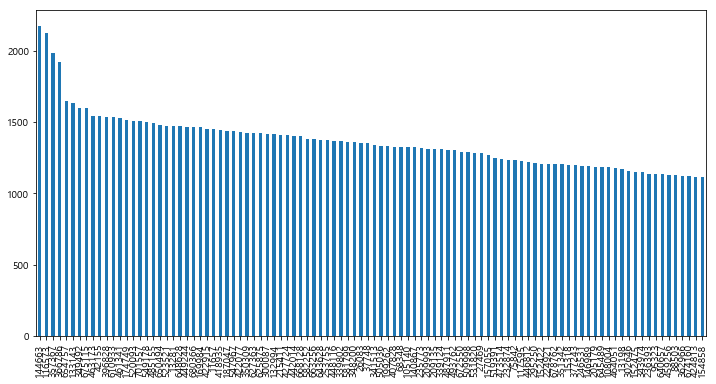

In [79]:
merged_df.id.value_counts(ascending = False).head(100).plot(kind = "bar",
                                                           figsize = (12,6))

In [ ]:
# playlist안에 있는 곡중 인기 있는 곡의 비중?

In [92]:
counts_in_plylst = pd.DataFrame(merged_df.id.value_counts().reset_index()).rename(columns = {"index" : "id","id": "counts_in_plylst"})

In [98]:
counts_in_plylst = merged_df.loc[:, ["id","plylst_id"]].merge(counts_in_plylst).sort_values( by = "plylst_id" )

In [101]:
counts_in_plylst_ms = counts_in_plylst.groupby("plylst_id").aggregate({"counts_in_plylst" : ["mean","std"]})

In [109]:
counts_in_plylst_ms.columns = ["_".join(x) for x in counts_in_plylst_ms.columns]

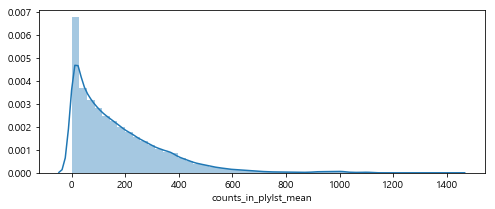

In [111]:
sns.distplot(counts_in_plylst_ms.counts_in_plylst_mean)

In [113]:
pd.qcut(counts_in_plylst_ms.counts_in_plylst_mean, 10, labels=range(1,11))

plylst_id
1          2
2          3
4          9
5         10
6          2
          ..
153423     2
153425     1
153426     5
153427     2
153428     4
Name: counts_in_plylst_mean, Length: 115071, dtype: category
Categories (10, int64): [1 < 2 < 3 < 4 ... 7 < 8 < 9 < 10]

In [116]:
merged_df.loc[:, ["id","plylst_id","song_gn_gnr_basket"]].merge(counts_in_plylst).sort_values( by = "plylst_id" )

,id,plylst_id,song_gn_gnr_basket,counts_in_plylst
0,308020,1,[GN0300],71
1,662131,1,[GN0300],3
2,47805,1,[GN0300],3
3,418970,1,"[GN0500, GN0300]",2
4,117747,1,"[GN0500, GN0300]",2
...,...,...,...,...
5285839,474886,153428,"[GN0500, GN0300]",28
5285841,329704,153428,"[GN0500, GN0300]",23
5285842,79442,153428,[GN0300],35
5285831,4326,153428,[GN0300],21


### Genre

In [125]:
genre_gn_all

GN0100       발라드
GN0101    세부장르전체
GN0102       '80
GN0103       '90
GN0104       '00
           ...  
GN2900       뮤지컬
GN2901    세부장르전체
GN2902     국내뮤지컬
GN2903     국외뮤지컬
GN3000     크리스마스
Length: 254, dtype: object

In [126]:
genre_gn_all = pd.DataFrame(genre_gn_all, columns = ['gnr_name']).reset_index().rename(columns = {'index' : 'gnr_code'})

In [130]:
# 장르코드 뒷자리 두 자리가 00인 코드를 필터링
gnr_code = genre_gn_all[genre_gn_all['gnr_code'].str[-2:] == '00']

# 장르코드 뒷자리 두 자리가 00이 아닌 코드를 필터링
dtl_gnr_code = genre_gn_all[genre_gn_all['gnr_code'].str[-2:] != '00']
dtl_gnr_code.rename(columns = {'gnr_code' : 'dtl_gnr_code', 'gnr_name' : 'dtl_gnr_name'}, inplace = True)

# 앞자리 네 자리 공통코드 추출
gnr_code = gnr_code.assign(join_code = gnr_code['gnr_code'].str[0:4])
dtl_gnr_code = dtl_gnr_code.assign(join_code = dtl_gnr_code['dtl_gnr_code'].str[0:4])

# Merge
gnr_code_tree = pd.merge(gnr_code, dtl_gnr_code, how = 'left', on = 'join_code')

gnr_code_tree = gnr_code_tree[['gnr_code', 'gnr_name', 'dtl_gnr_code', 'dtl_gnr_name']]

c:\python37\lib\site-packages\pandas\core\frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [132]:
gnr_code_tree.head(20)

,gnr_code,gnr_name,dtl_gnr_code,dtl_gnr_name
0,GN0100,발라드,GN0101,세부장르전체
1,GN0100,발라드,GN0102,'80
2,GN0100,발라드,GN0103,'90
3,GN0100,발라드,GN0104,'00
4,GN0100,발라드,GN0105,'10-
5,GN0200,댄스,GN0201,세부장르전체
6,GN0200,댄스,GN0202,'80
7,GN0200,댄스,GN0203,'90
8,GN0200,댄스,GN0204,'00
9,GN0200,댄스,GN0205,'10-


In [156]:
gnr_code.drop("join_code", axis=1, inplace = True)

In [134]:
song_meta.loc[song_meta.id == 418970]

,song_gn_dtl_gnr_basket,issue_date,album_name,album_id,artist_id_basket,song_name,song_gn_gnr_basket,artist_name_basket,id
418970,"[GN0501, GN0304, GN0505, GN0301]",20160527,세,2009906,[459383],어이세,"[GN0500, GN0300]",[fa`ce],418970


In [148]:
# playlist에 존재하는 곡 / 장르개수의 분포
merged_df.drop_duplicates("id", keep = "first").song_gn_gnr_basket.apply(lambda x: len(x)).value_counts(normalize= True)

1    0.857618
2    0.138123
3    0.002645
0    0.001535
4    0.000073
6    0.000005
5    0.000002
Name: song_gn_gnr_basket, dtype: float64

In [151]:
merged_df.drop_duplicates("id", keep = "first").artist_id_basket.apply(lambda x: len(x)).value_counts(normalize= True).cumsum()

1     0.931022
2     0.982822
3     0.994377
4     0.997241
5     0.998558
6     0.999101
7     0.999499
8     0.999663
9     0.999787
11    0.999854
10    0.999915
13    0.999932
15    0.999948
12    0.999959
14    0.999966
16    0.999972
20    0.999979
23    0.999984
17    0.999987
40    0.999989
19    0.999990
21    0.999992
22    0.999993
24    0.999995
28    0.999997
33    0.999998
41    1.000000
Name: artist_id_basket, dtype: float64

### Genre Rate in playlist

In [163]:
genre_in_plylist = np.dstack(
    (
        np.concatenate(merged_df.song_gn_gnr_basket.values),
        np.repeat(merged_df.plylst_id.values, list(map(len, merged_df.song_gn_gnr_basket))), 
    )
)

In [168]:
genre_in_plylist = pd.DataFrame(genre_in_plylist[0], columns=["genre_code", "plylst_id"])

In [ ]:
tmp_df = genre_in_plylist.groupby(["plylst_id", "genre_code"]).size().reset_index(name = "count")

In [190]:
genre_rate_in_plylist = pd.crosstab(tmp_df.plylst_id, tmp_df.genre_code, tmp_df["count"], aggfunc="sum", normalize="index")

In [220]:
genre_rate_in_plylist.columns = genre_rate_in_plylist.columns.map(gnr_code.set_index("gnr_code").to_dict().get("gnr_name"))

In [298]:
genre_rate_in_plylist.head(50)

genre_code,발라드,댄스,랩/힙합,R&B/Soul,인디음악,록/메탈,성인가요,포크/블루스,POP,록/메탈,...,CCM,어린이/태교,종교음악,국악,아이돌,일렉트로니카,EDM,뮤직테라피,뮤지컬,NaN
plylst_id,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.000000,0.714286,0.000000,0.285714,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
1000,0.052632,0.157895,0.157895,0.000000,0.000000,0.000000,0.052632,0.000000,0.157895,0.052632,...,0.00,0.000000,0.0,0.0,0.052632,0.000000,0.000000,0.0,0.000000,0.0
100000,0.148936,0.000000,0.000000,0.000000,0.319149,0.340426,0.000000,0.085106,0.000000,0.000000,...,0.00,0.000000,0.0,0.0,0.000000,0.021277,0.000000,0.0,0.000000,0.0
100001,0.089286,0.000000,0.035714,0.071429,0.107143,0.053571,0.000000,0.035714,0.000000,0.000000,...,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
100002,0.590909,0.045455,0.000000,0.136364,0.090909,0.045455,0.000000,0.090909,0.000000,0.000000,...,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
100004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.461538,0.307692,...,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
100005,0.058824,0.005348,0.037433,0.090909,0.245989,0.106952,0.000000,0.139037,0.080214,0.080214,...,0.00,0.000000,0.0,0.0,0.000000,0.026738,0.000000,0.0,0.000000,0.0
100006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.075581,0.058140,...,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
100007,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,0.062500,...,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0


Text(0.5, 1.0, 'Genre Rate in Playlist')

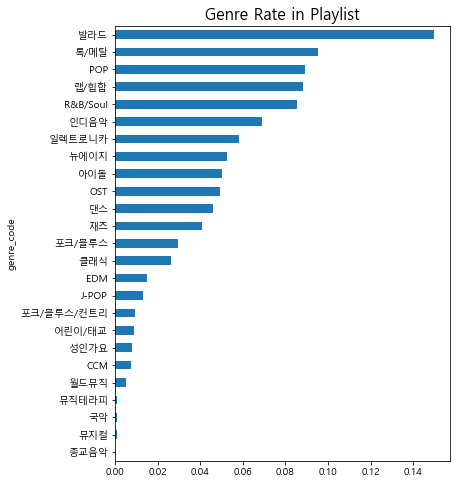

In [249]:
genre_rate_in_plylist.mean().reset_index(name = "rate").\
    groupby("genre_code").\
    sum().rate.\
    sort_values(ascending = True).\
    plot(
            kind = "barh",
            figsize = (6,8)
    )
    
plt.title("Genre Rate in Playlist", fontsize = 16)

In [234]:
gnr_code_tree.loc[gnr_code_tree.gnr_code.isin(["GN0400","GN1300"])]

,gnr_code,gnr_name,dtl_gnr_code,dtl_gnr_name
15,GN0400,R&B/Soul,GN0401,세부장르전체
16,GN0400,R&B/Soul,GN0402,어반
17,GN0400,R&B/Soul,GN0403,R&B
88,GN1300,R&B/Soul,GN1301,세부장르전체
89,GN1300,R&B/Soul,GN1302,컨템포러리 R&B
90,GN1300,R&B/Soul,GN1303,소울
91,GN1300,R&B/Soul,GN1304,어반
92,GN1300,R&B/Soul,GN1305,'60-'70
93,GN1300,R&B/Soul,GN1306,'80-'90
94,GN1300,R&B/Soul,GN1307,'00


Text(0.5, 1.0, 'Genre Rate in Playlist')

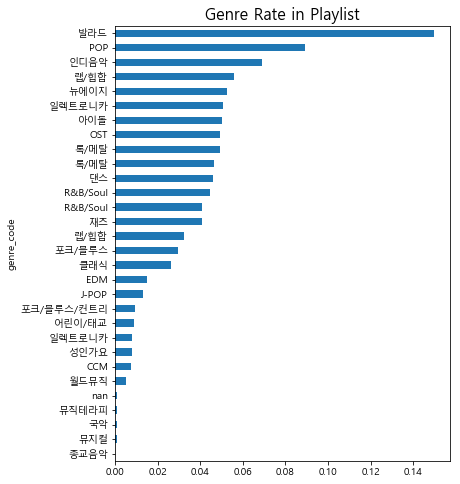

In [222]:
"""
genre_rate_in_plylist.mean(axis=0).\
    sort_values(ascending = True).\
    plot(
            kind = "barh",
            figsize = (6,8)
        )
    
plt.title("Genre Rate in Playlist", fontsize = 16)
"""

In [174]:
merged_df.loc[merged_df.plylst_id == 1]

,id,plylst_id,issue_date,album_id,artist_id_basket,song_gn_gnr_basket,issue_year,issue_month,issue_day
0,308020,1,20101109,1068355,[4770],[GN0300],2010,11,09
1,662131,1,20110511,1271655,[539281],[GN0300],2011,05,11
2,47805,1,20100506,880452,[164737],[GN0300],2010,05,06
3,418970,1,20160527,2009906,[459383],"[GN0500, GN0300]",2016,05,27
4,117747,1,20160527,2009906,[459383],"[GN0500, GN0300]",2016,05,27


In [257]:
song_meta.loc[:, ["id" , "song_gn_dtl_gnr_basket"]]

,id,song_gn_dtl_gnr_basket
0,0,[GN0901]
1,1,"[GN1601, GN1606]"
2,2,[GN0901]
3,3,"[GN1102, GN1101]"
4,4,"[GN1802, GN1801]"
...,...,...
707984,707984,[GN2001]
707985,707985,[GN0901]
707986,707986,"[GN0105, GN0101]"
707987,707987,"[GN1807, GN1801]"


### Detail Genre Rate in playlist

In [262]:
dtl_genre_in_plylist = np.dstack(
    (
        np.concatenate(merged_df.song_gn_dtl_gnr_basket.values),
        np.repeat(merged_df.plylst_id.values, list(map(len, merged_df.song_gn_dtl_gnr_basket))), 
    )
)

In [266]:
dtl_genre_in_plylist = pd.DataFrame(dtl_genre_in_plylist[0], columns = ["dtl_genre_code", "plylst_id"])

In [267]:
tmp_df = dtl_genre_in_plylist.groupby(["plylst_id", "dtl_genre_code"]).size().reset_index(name = "count")

In [268]:
tmp_df

,plylst_id,dtl_genre_code,count
0,1,GN0301,5
1,1,GN0302,1
2,1,GN0303,2
3,1,GN0304,2
4,1,GN0501,2
...,...,...,...
2081856,99999,GN2501,5
2081857,99999,GN2502,2
2081858,99999,GN2503,3
2081859,99999,GN2505,1


In [286]:
song_meta

,song_gn_dtl_gnr_basket,issue_date,album_name,album_id,artist_id_basket,song_name,song_gn_gnr_basket,artist_name_basket,id
0,[GN0901],20140512,불후의 명곡 - 7080 추억의 얄개시대 팝송베스트,2255639,[2727],Feelings,[GN0900],[Various Artists],0
1,"[GN1601, GN1606]",20080421,"Bach : Partitas Nos. 2, 3 & 4",376431,[29966],"Bach : Partita No. 4 In D Major, BWV 828 - II....",[GN1600],[Murray Perahia],1
2,[GN0901],20180518,Hit,4698747,[3361],Solsbury Hill (Remastered 2002),[GN0900],[Peter Gabriel],2
3,"[GN1102, GN1101]",20151016,Feeling Right (Everything Is Nice) (Feat. Popc...,2644882,[838543],Feeling Right (Everything Is Nice) (Feat. Popc...,[GN1100],[Matoma],3
4,"[GN1802, GN1801]",20110824,그남자 그여자,2008470,[560160],그남자 그여자,[GN1800],[Jude Law],4
...,...,...,...,...,...,...,...,...,...
707984,[GN2001],19991219,The Best Best Of The Black President,65254,[166499],Coffin For Head Of State,[GN2000],[Fela Kuti],707984
707985,[GN0901],19860000,True Colors,44141,[11837],Change Of Heart,[GN0900],[Cyndi Lauper],707985
707986,"[GN0105, GN0101]",20160120,행보 2015 윤종신 / 작사가 윤종신 Live Part.1,2662866,[437],스치듯 안녕,[GN0100],[윤종신],707986
707987,"[GN1807, GN1801]",20131217,명상의 시간을 위한 뉴에이지 음악,2221722,[729868],숲의 빛,[GN1800],[Nature Piano],707987


In [269]:
dtl_genre_in_plylist = pd.crosstab(tmp_df.plylst_id, tmp_df.dtl_genre_code, tmp_df["count"], aggfunc="sum", normalize="index")

In [270]:
dtl_genre_in_plylist

dtl_genre_code,GN0101,GN0102,GN0103,GN0104,GN0105,GN0201,GN0202,GN0203,GN0204,GN0205,...,GN2704,GN2801,GN2802,GN2803,GN2804,GN2805,GN2806,GN2901,GN2902,GN2903
plylst_id,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000,0.037037,0.0,0.0,0.000000,0.000000,0.111111,0.0,0.0,0.037037,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100000,0.066667,0.0,0.0,0.009524,0.047619,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100001,0.040650,0.0,0.0,0.000000,0.024390,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100002,0.279070,0.0,0.0,0.046512,0.186047,0.023256,0.0,0.0,0.000000,0.023256,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99991,0.025974,0.0,0.0,0.000000,0.019481,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99992,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99993,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [279]:
dtl_genre_in_plylist.columns = dtl_genre_in_plylist.columns.map(gnr_code_tree.set_index("dtl_gnr_code").to_dict().get("dtl_gnr_name"))

In [281]:
dtl_genre_in_plylist.mean(axis=0)

dtl_genre_code
세부장르전체    0.073695
'80       0.000998
'90       0.003827
'00       0.017813
'10-      0.037999
            ...   
숙면유도      0.000055
반려동물      0.000120
세부장르전체    0.000339
국내뮤지컬     0.000138
국외뮤지컬     0.000201
Length: 219, dtype: float64

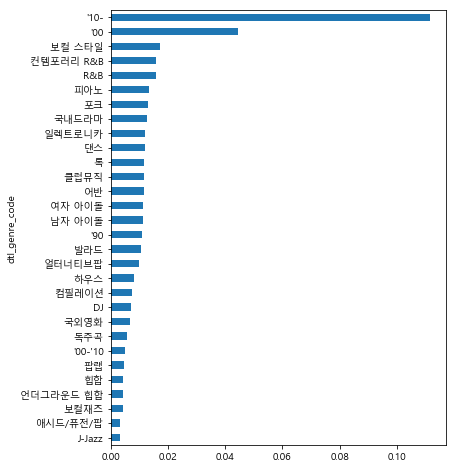

In [293]:
dtl_genre_in_plylist.mean().reset_index(name = "rate").\
    groupby("dtl_genre_code").\
    sum().rate.\
    sort_values(ascending = True)[-31:-1].\
    plot(
            kind = "barh",
            figsize = (6,8)
    )

In [294]:
song_meta.head()

,song_gn_dtl_gnr_basket,issue_date,album_name,album_id,artist_id_basket,song_name,song_gn_gnr_basket,artist_name_basket,id
0,[GN0901],20140512,불후의 명곡 - 7080 추억의 얄개시대 팝송베스트,2255639,[2727],Feelings,[GN0900],[Various Artists],0
1,"[GN1601, GN1606]",20080421,"Bach : Partitas Nos. 2, 3 & 4",376431,[29966],"Bach : Partita No. 4 In D Major, BWV 828 - II....",[GN1600],[Murray Perahia],1
2,[GN0901],20180518,Hit,4698747,[3361],Solsbury Hill (Remastered 2002),[GN0900],[Peter Gabriel],2
3,"[GN1102, GN1101]",20151016,Feeling Right (Everything Is Nice) (Feat. Popc...,2644882,[838543],Feeling Right (Everything Is Nice) (Feat. Popc...,[GN1100],[Matoma],3
4,"[GN1802, GN1801]",20110824,그남자 그여자,2008470,[560160],그남자 그여자,[GN1800],[Jude Law],4


In [295]:
train.head()

,tags,id,plylst_title,songs,like_cnt,updt_date
0,[락],61281,여행같은 음악,"[525514, 129701, 383374, 562083, 297861, 13954...",71,2013-12-19 18:36:19.000
1,"[추억, 회상]",10532,요즘 너 말야,"[432406, 675945, 497066, 120377, 389529, 24427...",1,2014-12-02 16:19:42.000
2,"[까페, 잔잔한]",76951,"편하게, 잔잔하게 들을 수 있는 곡.-","[83116, 276692, 166267, 186301, 354465, 256598...",17,2017-08-28 07:09:34.000
3,"[연말, 눈오는날, 캐럴, 분위기, 따듯한, 크리스마스캐럴, 겨울노래, 크리스마스,...",147456,크리스마스 분위기에 흠뻑 취하고 싶을때,"[394031, 195524, 540149, 287984, 440773, 10033...",33,2019-12-05 15:15:18.000
4,[댄스],27616,추억의 노래 ㅋ,"[159327, 553610, 5130, 645103, 294435, 100657,...",9,2011-10-25 13:54:56.000


In [304]:
merged_df

,id,plylst_id,issue_date,album_id,artist_id_basket,song_gn_gnr_basket,issue_year,issue_month,issue_day,song_gn_dtl_gnr_basket
0,308020,1,20101109,1068355,[4770],[GN0300],2010,11,09,"[GN0303, GN0301]"
1,308020,227,20101109,1068355,[4770],[GN0300],2010,11,09,"[GN0303, GN0301]"
2,308020,2948,20101109,1068355,[4770],[GN0300],2010,11,09,"[GN0303, GN0301]"
3,308020,5619,20101109,1068355,[4770],[GN0300],2010,11,09,"[GN0303, GN0301]"
4,308020,8725,20101109,1068355,[4770],[GN0300],2010,11,09,"[GN0303, GN0301]"
...,...,...,...,...,...,...,...,...,...,...
5285866,241564,153425,20191217,10366907,"[1909410, 979264]",[GN1600],2019,12,17,"[GN1601, GN1606]"
5285867,150780,153425,20191025,10343175,[2748741],[GN1600],2019,10,25,"[GN1601, GN1605]"
5285868,135244,153425,20181116,10222630,[2842],[GN1600],2018,11,16,"[GN1601, GN1613, GN1606]"
5285869,215898,153425,20130506,2953335,[1243191],[GN1600],2013,05,06,[GN1601]


### tags 연관분석

In [305]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

In [ ]:
train_tags = train.tags.tolist()

te = TransactionEncoder()
te_ary = te.fit(train_tags).transform(train_tags)

df = pd.DataFrame(te_ary, columns=te.columns_) #위에서 나온걸 보기 좋게 데이터프레임으로 변경

frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

In [306]:
frequent_itemsets[frequent_itemsets.itemsets.apply(lambda x : len(x) > 1)].sort_values(by = "support", ascending = False)

,support,itemsets
108,0.061058,"(휴식, 힐링)"
91,0.050491,"(밤, 새벽)"
73,0.039697,"(기분전환, 드라이브)"
106,0.037664,"(회상, 추억)"
93,0.037099,"(사랑, 설렘)"
87,0.028435,"(랩, 힙합)"
81,0.028400,"(휴식, 기분전환)"
69,0.028243,"(감성, 잔잔한)"
101,0.026662,"(이별, 슬픔)"
104,0.024428,"(휴식, 잔잔한)"


### artist in playlist

In [319]:
artist_in_plylst = songs_in_plylst.merge(song_meta.loc[:, ["id", "artist_id_basket"]], on = "id").sort_values(by =  "plylst_id").reset_index(drop = True)

In [321]:
artist_in_plylst = np.dstack(
    (
        np.concatenate(artist_in_plylst.artist_id_basket.values),
        np.repeat(artist_in_plylst.plylst_id.values, list(map(len, artist_in_plylst.artist_id_basket))), 
    )
)

In [324]:
artist_in_plylst = pd.DataFrame(artist_in_plylst[0], columns = ["artist_id", "plylst_id"])

In [325]:
artist_in_plylst.groupby("plylst_id")

,artist_id,plylst_id
0,4770,1
1,539281,1
2,164737,1
3,459383,1
4,459383,1
...,...,...
5754736,27744,153428
5754737,567813,153428
5754738,567813,153428
5754739,402820,153428


In [326]:
tmp_df = artist_in_plylst.groupby(["plylst_id", "artist_id"]).size().reset_index(name = "count")

In [335]:
(np.max([1,1,3,1,1,1,1,]) - np.std([1,1,3,1,1,1,1,])) / sum([1,1,3,1,1,1,1,])

0.25557175419735945

In [336]:
(np.max([1,1,3,1,1,]) - np.std([1,1,3,1,1,])) / sum([1,1,3,1,1,])

0.31428571428571433

In [337]:
def artist_redundancy(artist_lst):
    return (np.max(artist_lst) - np.std(artist_lst)) / np.sum(artist_lst)

In [344]:
from collections import Counter

In [342]:
a = [3.3,3]
b = [2,2,2]
c = [2,2,1,1]

artist_redundancy(a), artist_redundancy(b), artist_redundancy(c)

In [349]:
song_meta.shape

(707989, 9)

In [351]:
merged_df.id.nunique()

615142